# Lab 1 (already)

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_excel('Online Retail.xlsx')

In [69]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [71]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


### Null and missing values
The dataset source suggests that there are no missing values here. So we can assume that any null that occurs are intentional.

In [72]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

We can see above that the **1454** nulls in **Description** are left null due to lack of description provided at sale.
The **135080** nulls for the **CustomerID** suggest those sales were to wholesellers. 

To remedy this we will ignore the **Description** nulls and split the data into retail and wholesellers.

In [73]:
df[df['Description'].isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [74]:
retail = df[df['CustomerID']!=0]
whole = df[df['CustomerID']==0]

### Unique

In [75]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

There are no indexable column as there is no unique identifier for each row. 

### Outlier removal

<Axes: >

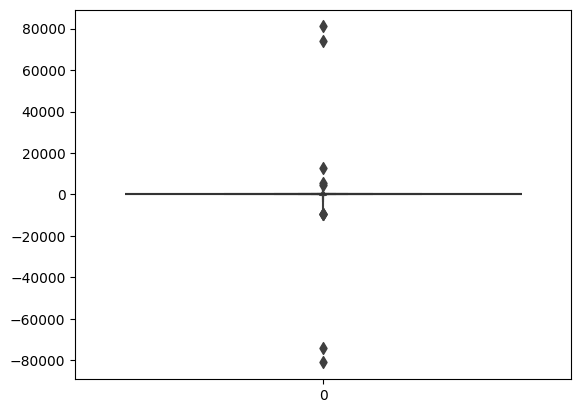

In [76]:
sns.boxenplot(df['Quantity'])

The plot above suggests that both the outlier in the positive side have been returned due to wrong billing. So I will remove these datapoints.

In [78]:
df['Quantityfr'] = (df['Quantity'] - df['Quantity'].mean())/df['Quantity'].std()

In [79]:
# Removing outliers that constitute 99 percent values 
outlier_removed = df[np.abs(df['Quantityfr']) < 2.6 ]

In [81]:
df = df.drop('Quantityfr', axis=1)

### Irrelevant data

In [82]:
df[df['Quantity'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


All the negative quantites indicate a purchase return to the store. So we will store them in a different dataframe.

In [84]:
purchRe = outlier_removed[df['Quantity'] < 0]
purch = outlier_removed[df['Quantity'] > 0]

/tmp/ipykernel_1378/2040101417.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  purchRe = outlier_removed[df['Quantity'] < 0]
/tmp/ipykernel_1378/2040101417.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  purch = outlier_removed[df['Quantity'] > 0]


## Sales Analysis

### Top ten best selling items by quantity

<Axes: xlabel='StockCode'>

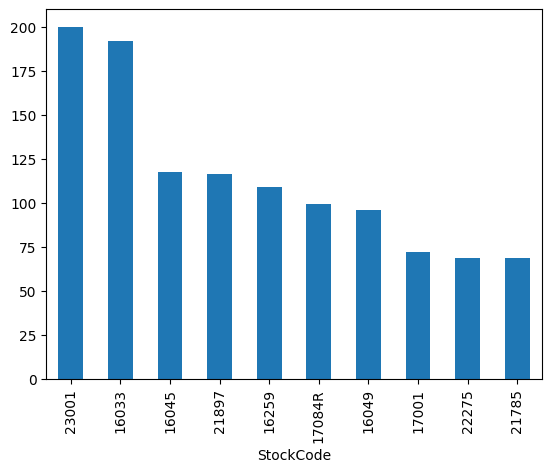

In [115]:
# Grouping all the products by stock code

products = purch.groupby('StockCode')[['Quantity','UnitPrice']].mean()
products.sort_values(by='Quantity', ascending=False)[:10]['Quantity'].plot(kind='bar')

In [106]:
items = products.sort_values(by='Quantity', ascending=False)[:10].index

In [107]:
rerer = purch.groupby('StockCode')['Description'].sum()

In [108]:
rerer[items]

StockCode
85099B    JUMBO BAG RED RETROSPOTJUMBO BAG RED RETROSPOT...
22197     SMALL POPCORN HOLDERSMALL POPCORN HOLDERSMALL ...
84077     WORLD WAR 2 GLIDERS ASSTD DESIGNSWORLD WAR 2 G...
84879     ASSORTED COLOUR BIRD ORNAMENTASSORTED COLOUR B...
85123A    WHITE HANGING HEART T-LIGHT HOLDERWHITE HANGIN...
21212     PACK OF 72 RETROSPOT CAKE CASESPACK OF 72 RETR...
22492     MINI PAINT SET VINTAGE MINI PAINT SET VINTAGE ...
22178     VICTORIAN GLASS HANGING T-LIGHTVICTORIAN GLASS...
23084     RABBIT NIGHT LIGHTRABBIT NIGHT LIGHTRABBIT NIG...
23203     mailoutJUMBO BAG DOILEY PATTERNSJUMBO BAG DOIL...
Name: Description, dtype: object

### Total revenue generated by each product

In [103]:
purch['Sales'] = purch["Quantity"] + purch['UnitPrice']

/tmp/ipykernel_1378/858986068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purch['Sales'] = purch["Quantity"] + purch['UnitPrice']


<Axes: xlabel='StockCode'>

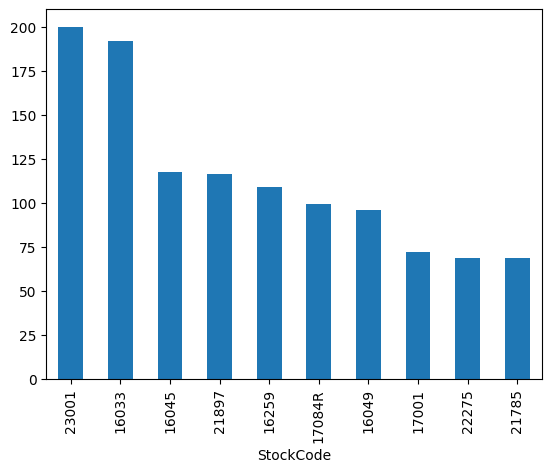

In [114]:
sales = purch.groupby('StockCode')['Sales'].mean()
products.sort_values(by='Quantity', ascending=False)[:10]['Quantity'].plot(kind='bar')

### Monthly revenue trend

In [121]:
purch['month'] = purch.InvoiceDate.dt.month

/tmp/ipykernel_1378/3710100519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purch['month'] = purch.InvoiceDate.dt.month


<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='month'>

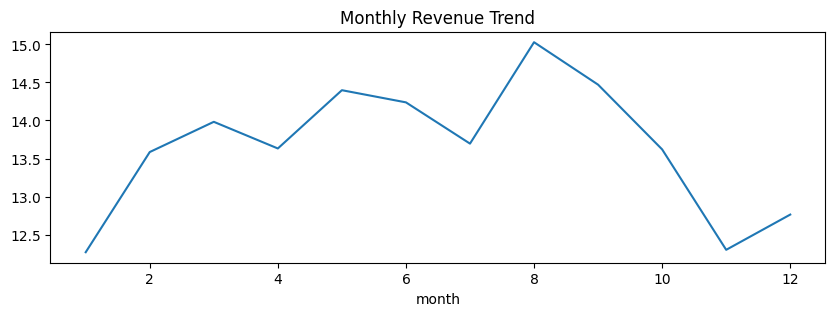

In [125]:
monthly_revenue = purch.groupby('month')['Sales'].mean()
monthly_revenue.plot(kind='line', figsize=(10, 3), title="Monthly Revenue Trend")


### Product Performance

<Axes: xlabel='InvoiceNo'>

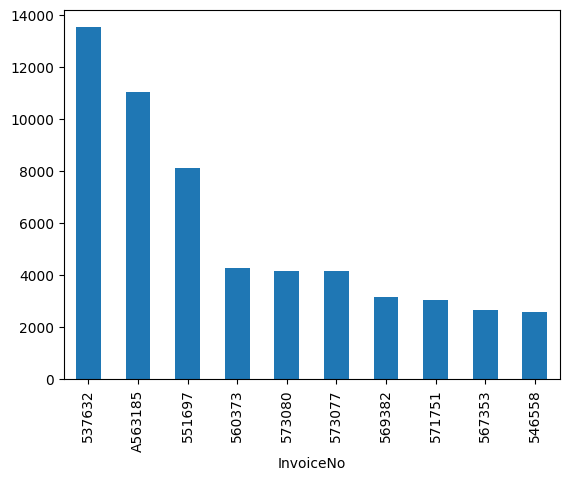

In [133]:
inv = purch.groupby('InvoiceNo')['Sales'].mean()
inv = inv.sort_values(ascending=False)[:100]
inv[:10].plot(kind='bar')

In [139]:
ind = list(inv.index)
new = purch.set_index('InvoiceNo')

In [145]:
purch[purch['InvoiceNo'].isin(ind)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quantityfr,Sales,month
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,-0.039216,13542.33,12
30364,538861,22444,NaN,460,2010-12-14 14:04:00,0.00,NaN,United Kingdom,2.065505,460.00,12
38464,539578,84991,60 TEATIME FAIRY CAKE CASES,480,2010-12-20 12:45:00,0.40,13027.0,United Kingdom,2.157214,480.40,12
38465,539578,21977,PACK OF 60 PINK PAISLEY CAKE CASES,480,2010-12-20 12:45:00,0.40,13027.0,United Kingdom,2.157214,480.40,12
38466,539578,21975,PACK OF 60 DINOSAUR CAKE CASES,480,2010-12-20 12:45:00,0.40,13027.0,United Kingdom,2.157214,480.40,12
...,...,...,...,...,...,...,...,...,...,...,...
438920,574341,22304,COFFEE MUG BLUE PAISLEY DESIGN,432,2011-11-04 10:09:00,1.12,18102.0,United Kingdom,1.937113,433.12,11
445766,574860,22714,CARD BIRTHDAY COWBOY,500,2011-11-07 12:10:00,0.36,17857.0,United Kingdom,2.248923,500.36,11
451852,575296,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,540,2011-11-09 12:25:00,0.79,16041.0,United Kingdom,2.432341,540.79,11
468046,576389,M,Manual,1,2011-11-15 10:05:00,850.50,12748.0,United Kingdom,-0.039216,851.50,11


In [146]:
len(ind)

100

In [ ]:

average_order_value = purch.groupby('InvoiceNo')['Sales'].sum().mean()

aov_by_country = df_cleaned.groupby('Country')['TotalSales'].mean().sort_values(ascending=False).head(10)

# Display the average order value and its variation across the top 10 countries
average_order_value, aov_by_country
